# 機器學習流程
# 1.讀取資料
# 2.數據清洗
# 3.特徵工程
# 4.相關性分析
# 5.訓練模型

# 1.讀取資料

In [ ]:
# 環境準備，使用 Python NumPy、Pandas
import pandas as pd
import numpy as np

In [ ]:
# train資料來源
df_train_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_DisasterTweets_DistilBERT/main/nlp-getting-started/train.csv'

df_train = pd.read_csv(df_train_url)

df_train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [ ]:
# 看數據的基本統計數據，並檢查每條推文的文字長度
df_train["length"] = df_train["text"].apply(lambda x: len(x))


print("Train Length Stat")
print(df_train["length"].describe())

Train Length Stat
count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64


# 2.數據清洗

In [ ]:
# 查看文本36，現在有@PhDSquares
df_train['text'][36]

"@PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season."

In [ ]:
import re


# 寫清洗函數
def clean_text(rawText):
    # 用re.sub()來做單字替換

    # 用正則式抓取特定文字
    # https? = 適配https or http (?為前一個字可有可無)
    # \/ = /
    # .* = 任何字串
    rawText[:] = [re.sub(r'https?:\/\/.*', 'URL', text) for text in rawText] # 把所有的網址轉換為URL這個單字

    # @\w+ = 用\w抓取@後面的所有字(用+代表抓取後面多個字元)
    # [-.]\w = 抓取-和.後面的字(可以防止@後面有-或是.，造成抓取不完全的問題)
    # ()* = 匹配多個括號內的狀況(可以匹配多個被-和.分隔開的狀況)
    rawText[:] = [re.sub(r'@\w+([-.]\w+)*', '', text) for text in rawText] # 把@後面的字轉換為空白
    rawText[:] = [re.sub(r'&\w+([-.]\w+)*', '', text) for text in rawText] # 把&後面的字轉換為空白

    # 回傳整理好的rawText
    return rawText[:]

# 呼叫清洗函數工作
# 把htttp轉化為了URL統一標識，且去掉了@和&這兩個相對於#來說沒有價值的噪音
# 用.copy()先拷貝出一份df_train['text']再丟入清洗函數中，防止發生鍊式賦值的情況，導致賦值失敗
df_train['text'] = clean_text(df_train['text'].copy())

In [ ]:
# 查看文本36，現在@PhDSquares已經被替換成空白
df_train['text'][36]

" #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season."

# 3.特徵工程

In [ ]:
# DistilBERT模型直接載入文本內容進行訓練不用提取特徵

# 4.相關性分析

In [ ]:
# DistilBERT模型直接載入文本內容進行訓練，直接用全部的文本

# 5.訓練模型

In [ ]:
# 分割訓練集和測試集
from sklearn.model_selection import train_test_split


# 這裡主要是text變數用來訓練模型，這個變數沒有缺失值，其他變數有缺失，但是用不到，包括keyword，location這些，都用不到，
# 當作分類變數來用，裡面種類太多，不具有分析價值
X = df_train["text"]
y = df_train["target"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 安裝keras_hub來使用DistilBert模型
!pip install keras_hub

In [ ]:
import keras_hub

# 載入 DistilBERT 模型
preset = "distil_bert_base_en"


# 查看了text變量，訓練集最大長度是157,測試集是151,所以使用長度為160,不足的會進行填充，因為沒有長於160的，所有不會有text被截斷
# 較長的sequence_length(序列長度)意味著模型可以捕捉更長期的依賴性並學習更複雜的模式，但它也增加了計算成本以及梯度消失或爆炸的風險
# 較短的sequence_length(序列長度)意味著模型可以訓練得更快並避免梯度問題，但它也會減少上下文量和模型的表達能力。
preprocessor = keras_hub.models.DistilBertPreprocessor.from_preset(preset, sequence_length=160)

# num_classes = 整數。要預測的類別數。
classifier = keras_hub.models.DistilBertClassifier.from_preset(preset, preprocessor=preprocessor, num_classes=2)

# 顯示模型
classifier.summary()

Preprocessor: "distil_bert_text_classifier_preprocessor_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)                   │                       Vocab size: 28,996 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "distil_bert_text_classifier_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ distil_bert_backbone          │ (None, None, 768)         │      65,190,912 │ padding_mask[0][0],        │
│ (DistilBertBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_2 (GetItem)          │ (None, 768)               │               0 │ distil_bert_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ get_item_2[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 65,783,042 (250.94 MB)

 Trainable params: 65,783,042 (250.94 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import keras
# 編譯模型
classifier.compile(
    # from_logits = True表示模型所獲得的損失值未標準化，基本上在模型中沒有任何 softmax 函數時使用，它有助於數值穩定性
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # Adam 最佳化是一種計算效率高，記憶體需求小，對梯度對角線縮放不變，並且非常適合數據/參數較大的問題
    optimizer=keras.optimizers.Adam(1e-5),
    # metrics評估標準為accuracy
    metrics=["accuracy"]
)


# 訓練模型
history = classifier.fit(
    x=X_train,
    y=y_train,

    # batch：把資料分成一組或一堆分批放到模型訓練，中文翻批次
    # batch size：資料分批送進神經網路的每一組資料的大小，keras 中若未設定，預設是batch_size=32
    batch_size=32,
    # epoch：訓練資料集裡所有資料一次叫一個 epoch，中文翻訓練週期
    epochs=2,
    validation_data=(X_val, y_val)
)

Epoch 1/2
191/191 ━━━━━━━━━━━━━━━━━━━━ 180s 620ms/step - accuracy: 0.6982 - loss: 0.5775 - val_accuracy: 0.8221 - val_loss: 0.4122
Epoch 2/2
191/191 ━━━━━━━━━━━━━━━━━━━━ 90s 467ms/step - accuracy: 0.8306 - loss: 0.3978 - val_accuracy: 0.8326 - val_loss: 0.3991


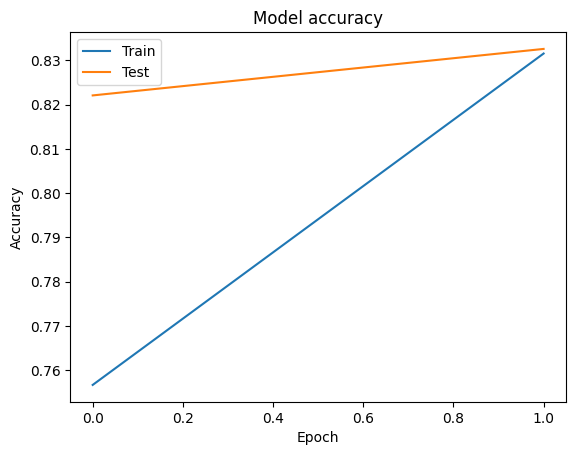

In [ ]:
# 繪製訓練 & 驗證的準確率值

import matplotlib.pyplot as plt  # 用於繪製圖表和繪圖的庫

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

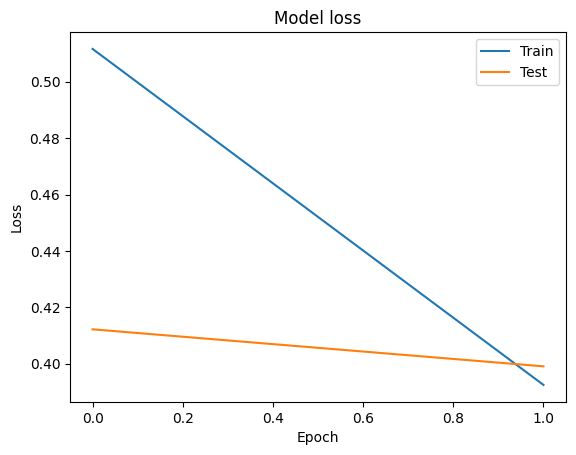

In [ ]:
# 繪製訓練 & 驗證的損失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 149ms/step


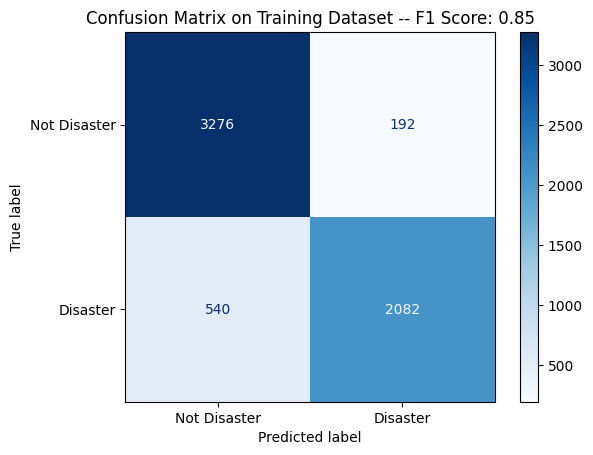

48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step


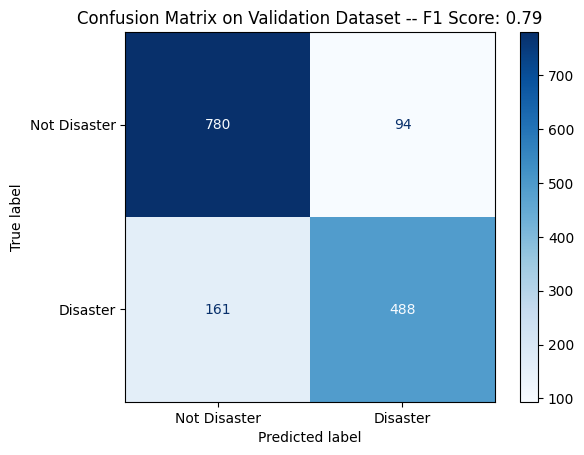

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # 計算和可視化混淆矩陣所需的函式庫

# 顯示混淆矩陣和F1分數的功能
def displayConfusionMatrix(y_true, y_pred, dataset):
    # 建立混淆矩陣顯示
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,  # 實際標籤
        np.argmax(y_pred, axis=1),  # 將預測結果轉換為標籤（以最大值對模型輸出進行分類）
        display_labels=["Not Disaster", "Disaster"],  # 指定標籤名稱（是否為災難）
        cmap=plt.cm.Blues  # 以藍色漸層顯示混淆矩陣
    )

    # 用confusion_matrix()取得混淆矩陣元素（真陰TN、偽陽FP、偽陰FFN、真陽TP）
    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()

    # 計算F1分數
    f1_score = tp / (tp + ((fn + fp) / 2))

    # 在圖表標題中顯示資料集名稱和 F1 分數
    disp.ax_.set_title(f"Confusion Matrix on {dataset} Dataset -- F1 Score: {f1_score.round(2)}")
    plt.show()  # 顯示圖表

# 對訓練資料進行預測並顯示混淆矩陣和F1分數
y_pred_train = classifier.predict(X_train)
displayConfusionMatrix(y_train, y_pred_train, "Training")

# 對驗證資料進行預測並顯示混淆矩陣和 F1 分數
y_pred_val = classifier.predict(X_val)
displayConfusionMatrix(y_val, y_pred_val, "Validation")

# 1.讀取資料

In [ ]:
# test資料來源
df_test_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_DisasterTweets_DistilBERT/main/nlp-getting-started/test.csv'

df_test = pd.read_csv(df_test_url)

df_test.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [ ]:
# 看數據的基本統計數據，並檢查每條推文的文字長度
df_test["length"] = df_test["text"].apply(lambda x: len(x))


print("test Length Stat")
print(df_test["length"].describe())

test Length Stat
count    3263.000000
mean      102.108183
std        33.972158
min         5.000000
25%        78.000000
50%       109.000000
75%       134.000000
max       151.000000
Name: length, dtype: float64


# 2.數據清洗

In [ ]:
# 呼叫清洗函數工作
# 把htttp轉化為了URL統一標識，且c去掉了@和&這兩個相對於#來說沒有價值的噪音
# 用.copy()先拷貝出一份df_test['text']再丟入清洗函數中，防止發生鍊式賦值的情況，導致賦值失敗
df_test['text'] = clean_text(df_test['text'].copy())

# 3.特徵工程

In [ ]:
# DistilBERT模型直接載入文本內容進行訓練不用提取特徵

# 4.相關性分析

In [ ]:
# DistilBERT模型直接載入文本內容進行訓練，直接用全部的文本

# 5.訓練模型

In [ ]:
# 這裡主要是text變數用來訓練模型，這個變數沒有缺失值，其他變數有缺失，但是用不到，包括keyword，location這些，都用不到，
# 當作分類變數來用，裡面種類太多，不具有分析價值
X_test = df_test["text"]

In [ ]:
# 用訓練好的模型進行預測
y_pred_test = classifier.predict(X_test)

# 抓到x_test的第[]個文本的比對結果，並把結果印出至小數點第3位
print(np.round(y_pred_test[0],3))

102/102 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step
[-1.267  1.068]


In [ ]:
# 用np.argmax把[]中的最適結果印出來
predict = np.argmax(y_pred_test,axis=1)

print('prelabel:',predict[0])

prelabel: 1


In [ ]:
# 導出預測結果
test_DistilBERT_predict = pd.DataFrame()
test_DistilBERT_predict['id'] = df_test['id']
test_DistilBERT_predict['target'] = predict

# 顯示預測結果
test_DistilBERT_predict

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


In [ ]:
# 將預測結果導出為csv文件
test_DistilBERT_predict.to_csv('./DisasterTweets_DistilBERT.csv',index=False)